In [33]:
import pandas as pd
import numpy as np
import sys, os, io
import pstats

In [25]:
raw_filenames = os.listdir('nocalc_profiles')
print(len(raw_filenames))

36


In [67]:
# os.mkdir('temp')
# os.mkdir('temp/nocalc_profiles')
# os.mkdir('temp/isbound_profiles')
# for f in raw_filenames:
#     for d in ['nocalc_profiles/', 'isbound_profiles/']:
#         with open('temp/'+d+f, 'w') as newfile:
#             s = pstats.Stats(d+f, stream=newfile)
#             s.print_stats()
            

['1m', '32', '1.0.']

In [157]:
is_data = {}
no_data = {}
for f in raw_filenames:
    for d in ['nocalc_profiles/', 'isbound_profiles/']:
        dat = pd.read_fwf('temp/'+d+f, skiprows=6, widths=[9,9,9,9,9,100], header=0, index_col=False)
        if 'is' in d:
            is_data[tuple(f.split('stats')[0].split('_')[2:])] = dat
        else:
            no_data[tuple(f.split('stats')[0].split('_')[2:])] = dat            


In [432]:
is_data[('1m', '32', '1.0.')]['filename:lineno(function)'][is_data[('1m', '32', '1.0.')]['filename:lineno(function)'].apply(lambda x: 'main' in str(x))]

1291    qbic.py:286(main)
Name: filename:lineno(function), dtype: object

In [501]:
is_data[('1m', '32', '1.0.')]['filename:lineno(function)'][is_data[('1m', '32', '1.0.')]['filename:lineno(function)'].apply(lambda x: 'do_prediction' in str(x))]

1290    qbic.py:251(do_prediction)
Name: filename:lineno(function), dtype: object

In [502]:
is_data[('1m', '32', '1.0.')].sort_values(by='tottime', ascending=False)

,ncalls,tottime,percall,cumtime,percall.1,filename:lineno(function)
1362,24902/248,95 0.0,12 0.0,00 0.0,79 0.0,00 <frozen importlib._bootstrap>:1009(_handle_...
71,90682793/,90682792,8.098,0.000,8.285,0.000 {built-in method builtins.isinstance}
1286,1,9.573,9.573,367.624,367.624,qbic.py:218(postprocess)
1217,24789/166,84 6.5,35 0.0,00 6.5,50 0.0,00 {built-in method numpy.array}
103,90000512,8.133,0.000,8.133,0.000,{method 'get' of 'dict' objects}
1205,27,7.186,0.266,7.186,0.266,{method 'argsort' of 'numpy.ndarray' objects}
1207,13,7.000,0.538,7.000,0.538,{method 'copy' of 'numpy.ndarray' objects}
1151,16441/833,7 0.00,9 0.00,0 0.09,1 0.00,0 /home/ec2-user/miniconda3/lib/python3.7/site...
10,102,554.069,5.432,554.069,5.432,{method 'acquire' of '_thread.lock' objects}
979,6,43.256,7.209,129.718,21.620,{pandas._libs.lib.map_infer_mask}


In [503]:
is_data[('1m', '32', '0.01.')].sort_values('cumtime', ascending=False)

,ncalls,tottime,percall,cumtime,percall.1,filename:lineno(function)
66,63/1,0.001,0.000,619.245,619.245,{built-in method builtins.exec}
125,1,1.361,1.361,619.245,619.245,<string>:1(<module>)
1291,1,0.052,0.052,617.884,617.884,qbic.py:286(main)
1290,1,0.003,0.003,326.491,326.491,qbic.py:251(do_prediction)
10,102,320.106,3.138,320.106,3.138,{method 'acquire' of '_thread.lock' objects}
312,2,0.000,0.000,320.099,160.050,/home/ec2-user/miniconda3/lib/python3.7/concur...
1103,18,0.000,0.000,320.099,17.783,/home/ec2-user/miniconda3/lib/python3.7/thread...
1102,18,0.000,0.000,320.099,17.783,/home/ec2-user/miniconda3/lib/python3.7/thread...
182,1,0.000,0.000,203.316,203.316,/home/ec2-user/miniconda3/lib/python3.7/concur...
686,1,0.000,0.000,172.539,172.539,/home/ec2-user/miniconda3/lib/python3.7/site-p...


In [504]:
local_dat = is_data[('2m', '32', '1.0.')]
local_dat[local_dat['filename:lineno(function)'].apply(lambda x: 'do_prediction' in str(x))]#['cumtime'].values[0]

,ncalls,tottime,percall,cumtime,percall.1,filename:lineno(function)
1018,1,0.003,0.003,438.531,438.531,qbic.py:251(do_prediction)


In [505]:
def extract_do_prediction(local_dat):
    return float(local_dat[local_dat['filename:lineno(function)'].apply(lambda x: 'do_prediction' in str(x))]['cumtime'].values[0])

def extract_main(local_dat):
    return float(local_dat[local_dat['filename:lineno(function)'].apply(lambda x: 'main' in str(x))]['cumtime'].values[0])

In [506]:
extract_do_prediction(is_data[next(iter(is_data.keys()))])

806.133

In [507]:
vals = {}
for k,v in is_data.items():
    vals[k] = extract_do_prediction(v)
    
for k,v in no_data.items():
    vals[k] = vals[k] - extract_do_prediction(v)
    


In [509]:
df = pd.DataFrame.from_dict(vals, orient='index')

df.drop(('2m', '32', '1.0.'), inplace=True, axis=0)
df.drop(('2m', '16', '1.0.'), inplace=True, axis=0)
df.drop(('1m', '32', '1.0.'), inplace=True, axis=0)
df.drop(('2m', '32', '0.1.'), inplace=True, axis=0)

df.reset_index(inplace=True)

df['Millions of Mutations'] = df['index'].apply(lambda x: float(x[0][:-1]))
df['tf_size'] = df['index'].apply(lambda x: int(x[1]))
df['p-Value Threshold'] = df['index'].apply(lambda x: float(x[2][:-1]))

df.drop('index', axis=1, inplace=True)
r = df.columns.values
df.columns = ['CPU Time (s)'] + [r[1], r[2], r[3]]

display(df.shape)
df.head()

(32, 4)

,CPU Time (s),Millions of Mutations,tf_size,p-Value Threshold
0,212.025,2.0,8,1.00
1,18.915,0.5,8,0.01
2,231.496,2.0,32,0.01
3,52.752,0.5,8,1.00
4,89.811,0.5,32,0.10


In [510]:
df[df.tf_size==32]

,CPU Time (s),Millions of Mutations,tf_size,p-Value Threshold
2,231.496,2.0,32,0.0100
4,89.811,0.5,32,0.1000
9,157.647,0.5,32,1.0000
11,67.495,0.5,32,0.0100
14,179.622,1.0,32,0.1000
16,114.714,1.0,32,0.0100
20,44.520,0.5,32,0.0001
21,72.470,1.0,32,0.0001
26,153.924,2.0,32,0.0001


In [511]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

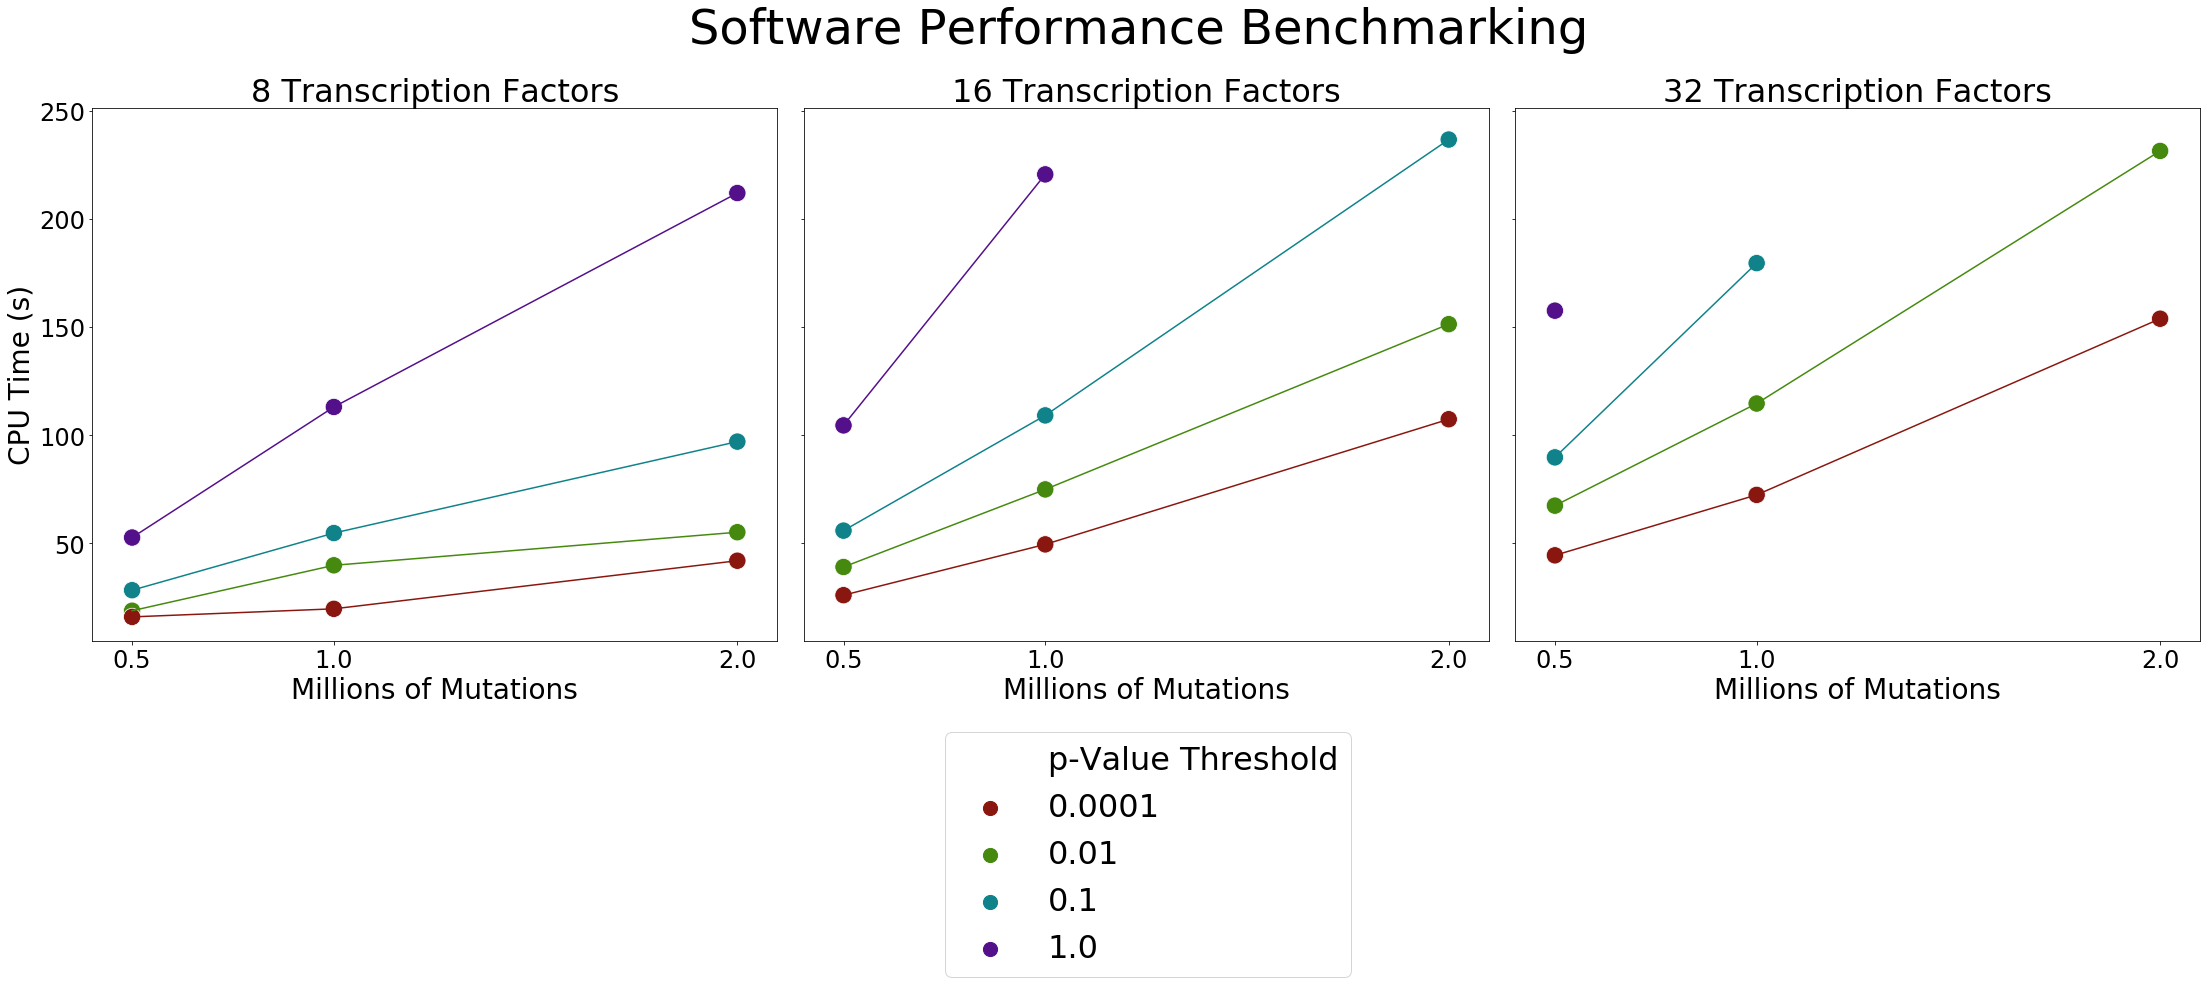

In [512]:
fig, axes = plt.subplots(ncols=3, figsize=(30,8), sharey=True, sharex=True)
plt.tight_layout()

axes[0].tick_params(axis="x", which='both', labelsize=24)
axes[0].tick_params(axis="y", which='both', labelsize=24)
axes[1].tick_params(axis="x", which='both', labelsize=24)
axes[2].tick_params(axis="x", which='both', labelsize=24)

pos_list=[0.5, 1.0, 2.0]
axes[0].xaxis.set_major_locator(ticker.FixedLocator((pos_list)))

#for a in axes:
#    a.set(xscale="log")
    
axes[0].set_title('8 Transcription Factors', fontsize=32)
axes[1].set_title('16 Transcription Factors', size=32)
axes[2].set_title('32 Transcription Factors', size=32)

axes[0].set_ylabel('CPU Time (s)', fontsize=28)
axes[0].set_xlabel('Millions of Mutations', fontsize=28)
axes[1].set_xlabel('Millions of Mutations', fontsize=28)
axes[2].set_xlabel('Millions of Mutations', fontsize=28)

sns.scatterplot(y='CPU Time (s)', x='Millions of Mutations', data = df[df.tf_size == 8], hue='p-Value Threshold', ax=axes[0], markers=True, palette=sns.hls_palette(4, l=.3, s=.8), s=300, legend=False)
sns.lineplot(y='CPU Time (s)', x='Millions of Mutations', data = df[df.tf_size == 8], hue='p-Value Threshold', ax=axes[0], markers=True, palette=sns.hls_palette(4, l=.3, s=.8), legend=False)

sns.scatterplot(y='CPU Time (s)', x='Millions of Mutations', data = df[df.tf_size == 16], hue='p-Value Threshold', ax=axes[1], markers=True, palette=sns.hls_palette(4, l=.3, s=.8), s=300, legend=False)
sns.lineplot(y='CPU Time (s)', x='Millions of Mutations', data = df[df.tf_size == 16], hue='p-Value Threshold', ax=axes[1], markers=True, palette=sns.hls_palette(4, l=.3, s=.8), legend=False)

sns.scatterplot(y='CPU Time (s)', x='Millions of Mutations', data = df[df.tf_size == 32], hue='p-Value Threshold', ax=axes[2], markers=True, palette=sns.hls_palette(4, l=.3, s=.8), s=300)
sns.lineplot(y='CPU Time (s)', x='Millions of Mutations', data = df[df.tf_size == 32], hue='p-Value Threshold', ax=axes[2], markers=True, palette=sns.hls_palette(4, l=.3, s=.8), legend=False)

plt.suptitle('Software Performance Benchmarking', size=48, y=1.15)

legend = plt.legend(bbox_to_anchor=(-.24, -.4), loc=5, borderaxespad=0., prop={'size': 32})


legend.legendHandles[1]._sizes = [200]
legend.legendHandles[2]._sizes = [200]
legend.legendHandles[3]._sizes = [200]
legend.legendHandles[4]._sizes = [200]

plt.show()

In [658]:
sns.set_style('ticks')

In [628]:
df['# TFs'] = df['tf_size']

In [587]:
from matplotlib.transforms import Bbox as bbox

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


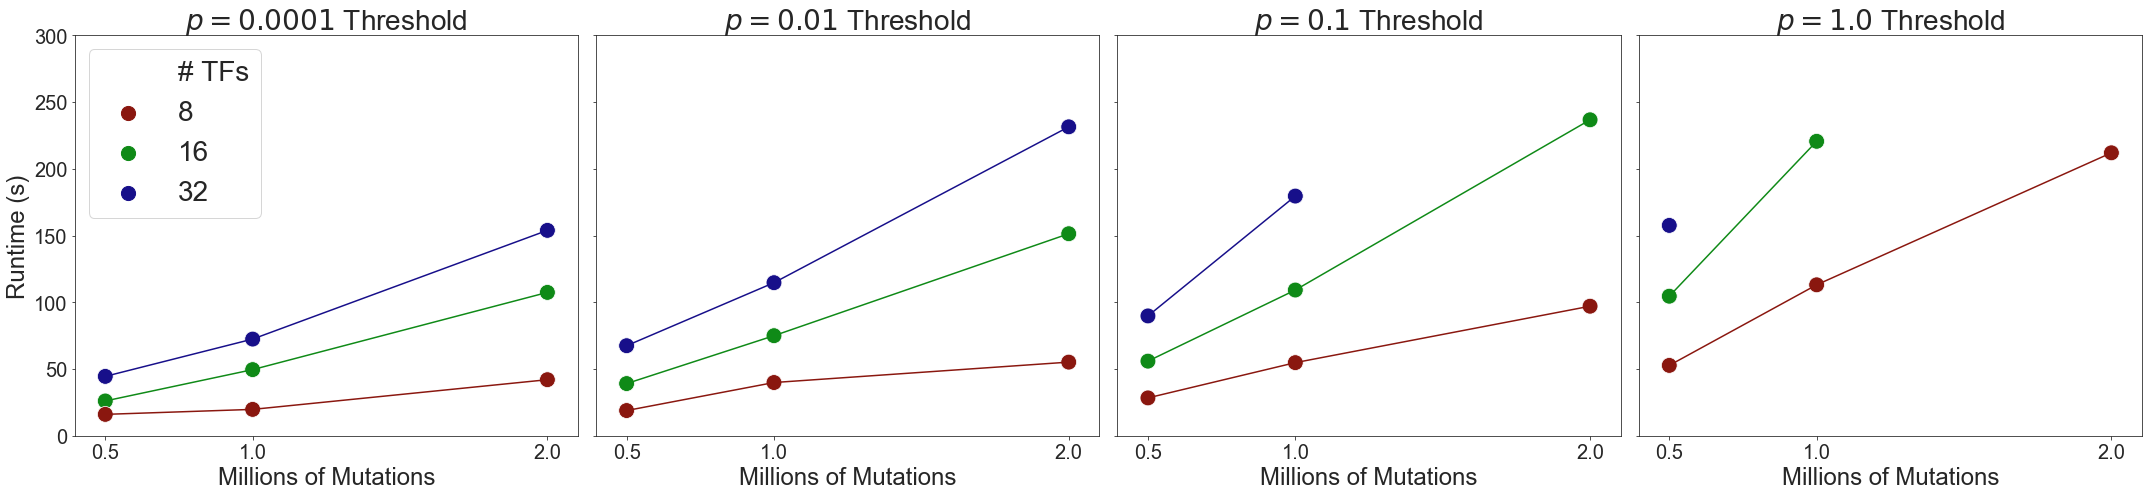

In [663]:
fig, axes = plt.subplots(ncols=4, figsize=(30,7), sharey=True, sharex=True)
plt.tight_layout()

axes[0].tick_params(axis="x", which='both', labelsize=20)
axes[0].tick_params(axis="y", which='both', labelsize=20)
axes[1].tick_params(axis="x", which='both', labelsize=20)
axes[2].tick_params(axis="x", which='both', labelsize=20)
axes[3].tick_params(axis="x", which='both', labelsize=20)

pos_list=[0.5, 1.0, 2.0]
axes[0].xaxis.set_major_locator(ticker.FixedLocator((pos_list)))
axes[0].set_ylim((0, 300))
#for a in axes:
#    a.set(xscale="log")
    
axes[0].set_title('$p = 0.0001$ Threshold', fontsize=28)
axes[1].set_title('$p = 0.01$ Threshold', size=28)
axes[2].set_title('$p = 0.1$ Threshold', size=28)
axes[3].set_title('$p = 1.0$ Threshold', size=28)


axes[0].set_xlabel('Millions of Mutations', fontsize=24)
axes[1].set_xlabel('Millions of Mutations', fontsize=24)
axes[2].set_xlabel('Millions of Mutations', fontsize=24)
axes[3].set_xlabel('Millions of Mutations', fontsize=24)

hue = '# TFs'
s = 250
y = 'CPU Time (s)'
x = 'Millions of Mutations'
mask_col = 'p-Value Threshold'
palette=sns.hls_palette(3, l=.3, s=.8)


sns.scatterplot(y=y, x=x, data = df[df[mask_col] == 0.0001], hue=hue, ax=axes[0], markers=True, palette=palette, s=s)
sns.lineplot(y=y, x=x, data = df[df[mask_col] == 0.0001], hue=hue, ax=axes[0], markers=True, palette=palette, legend=False)

sns.scatterplot(y=y, x=x, data = df[df[mask_col] == 0.01], hue=hue, ax=axes[1], markers=True, palette=palette, s=s, legend=False)
sns.lineplot(y=y, x=x, data = df[df[mask_col] == 0.01], hue=hue, ax=axes[1], markers=True, palette=palette, legend=False)
 
sns.scatterplot(y=y, x=x, data = df[df[mask_col] == 0.1], hue=hue, ax=axes[2], markers=True, palette=palette, s=s, legend=False)
sns.lineplot(y=y, x=x, data = df[df[mask_col] == 0.1], hue=hue, ax=axes[2], markers=True, palette=palette, legend=False)

sns.scatterplot(y=y, x=x, data = df[df[mask_col] == 1.0], hue=hue, ax=axes[3], markers=True, palette=palette, s=s, legend=False)
sns.lineplot(y=y, x=x, data = df[df[mask_col] == 1.0], hue=hue, ax=axes[3], markers=True, palette=palette, legend=False)

handles, labels = axes[0].get_legend_handles_labels()
legend = axes[0].legend(handles, labels, loc=2, prop={'size': 28})

#plt.suptitle('Software v3 IsBound Performance', size=40, y=1.10)

#legend = plt.legend(bbox_to_anchor=(-.5, -.4), loc=5, borderaxespad=0., prop={'size': 28})

legend.legendHandles[1]._sizes = [s*.8]
legend.legendHandles[2]._sizes = [s*.8]
legend.legendHandles[3]._sizes = [s*.8]
#legend.legendHandles[4]._sizes = [s*.8]

axes[0].set_ylabel('Runtime (s)', fontsize=24)

bb = bbox.from_bounds(-1,-.6, 32, 8)
plt.savefig('sw_isbound_perf.pdf', bbox_inches=bb)

plt.show()

In [513]:
df['# of Transcription Factors'] = df['tf_size']

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


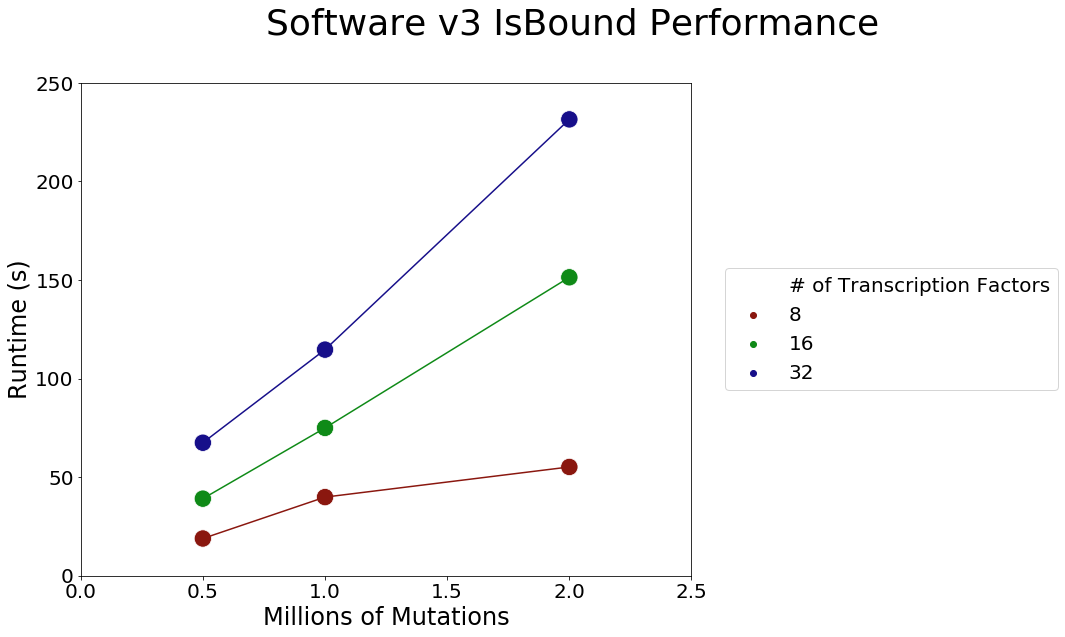

In [584]:
fig, axes = plt.subplots(figsize=(16, 8))
#plt.tight_layout()

axes.tick_params(axis="x", which='both', labelsize=20)
axes.tick_params(axis="y", which='both', labelsize=20)

#pos_list=[0.5, 1.0, 2.0]
#axes[0].xaxis.set_major_locator(ticker.FixedLocator((pos_list)))

#for a in axes:
#    a.set(xscale="log")
    
#axes[0].set_title('8 Transcription Factors', fontsize=32)
#axes[1].set_title('16 Transcription Factors', size=32)
#axes[2].set_title('32 Transcription Factors', size=32)


#axes.set_xlabel('Millions of Mutations', fontsize=28)
axes.set_xlabel('Millions of Mutations', fontsize=24)
#axes[2].set_xlabel('Millions of Mutations', fontsize=28)

sns.scatterplot(y='CPU Time (s)', x='Millions of Mutations', data = df[df['p-Value Threshold'] == .01], hue='# of Transcription Factors', ax=axes, markers=True, palette=sns.hls_palette(3, l=.3, s=.8), s=300)
sns.lineplot(y='CPU Time (s)', x='Millions of Mutations', data = df[df['p-Value Threshold'] == .01], hue='# of Transcription Factors', ax=axes, markers=True, palette=sns.hls_palette(3, l=.3, s=.8), legend=False)

plt.suptitle('Software v3 IsBound Performance', size=36, y=1.1)
axes.set_ylabel('Runtime (s)', fontsize=24)

plt.ylim((0, 250))
plt.xlim((0, 2.5))

legend = plt.legend(bbox_to_anchor=(1.6, 0.5), loc=5, borderaxespad=0., prop={'size': 20})
#legend = plt.legend(bbox_to_anchor=(-.24, -.4), loc=5, borderaxespad=0., prop={'size': 32})


#fig.subplots_adjust(bottom=0.15)

plt.savefig('sw_perf.pdf', pad_inches=0.2)

plt.show()

In [515]:
main_vals = {}
for k,v in is_data.items():
    main_vals[k] = extract_main(v)


In [519]:
main_df = pd.DataFrame.from_dict(main_vals, orient='index')

main_df.drop(('2m', '32', '1.0.'), inplace=True, axis=0)
main_df.drop(('2m', '16', '1.0.'), inplace=True, axis=0)
main_df.drop(('1m', '32', '1.0.'), inplace=True, axis=0)
main_df.drop(('2m', '32', '0.1.'), inplace=True, axis=0)

main_df.reset_index(inplace=True)

main_df['Millions of Mutations'] = main_df['index'].apply(lambda x: float(x[0][:-1]))
main_df['tf_size'] = main_df['index'].apply(lambda x: int(x[1]))
main_df['p-Value Threshold'] = main_df['index'].apply(lambda x: float(x[2][:-1]))

main_df.drop('index', axis=1, inplace=True)
r = main_df.columns.values
main_df.columns = ['CPU Time (s)'] + [r[1], r[2], r[3]]

display(main_df.shape)
main_df.head()

(32, 4)

,CPU Time (s),Millions of Mutations,tf_size,p-Value Threshold
0,1073.696,2.0,8,1.00
1,156.639,0.5,8,0.01
2,1157.334,2.0,32,0.01
3,301.280,0.5,8,1.00
4,458.836,0.5,32,0.10


In [517]:
percent_df = main_df.copy()
percent_df['IsBound Proportion'] = df['CPU Time (s)']/percent_df['CPU Time (s)']
percent_df['Number of TFs'] = percent_df['tf_size']
percent_df.head()

,CPU Time (s),Millions of Mutations,tf_size,p-Value Threshold,IsBound Proportion,Number of TFs
0,1073.696,2.0,8,1.00,0.197472,8
1,156.639,0.5,8,0.01,0.120755,8
2,1157.334,2.0,32,0.01,0.200025,32
3,301.280,0.5,8,1.00,0.175093,8
4,458.836,0.5,32,0.10,0.195737,32


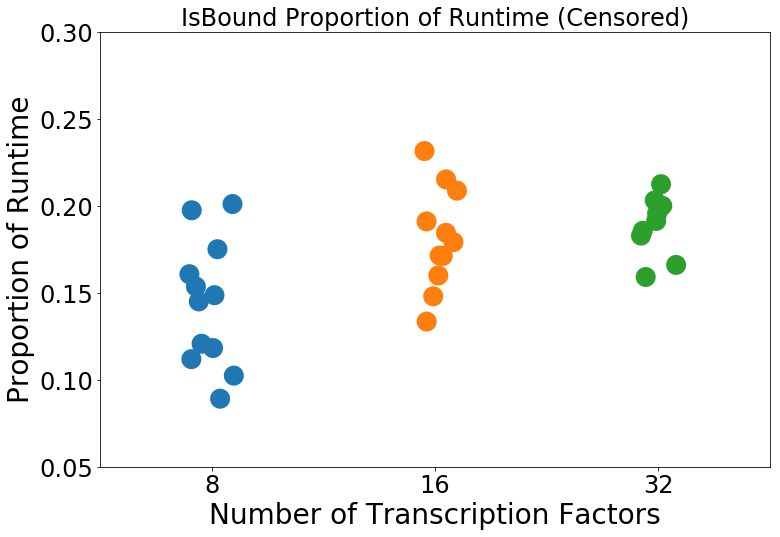

In [518]:
fig, ax = plt.subplots(figsize=(12,8))
sns.stripplot(y='IsBound Proportion', x='Number of TFs', data=percent_df, s=20)
plt.title('IsBound Proportion of Runtime (Censored)', size=24)
ax.tick_params(axis="x", which='both', labelsize=24)
ax.tick_params(axis="y", which='both', labelsize=24)
ax.set_ylabel('Proportion of Runtime', fontsize=28)
ax.set_xlabel('Number of Transcription Factors', fontsize=28)

ax.set_ylim((0.05, 0.3))
         
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


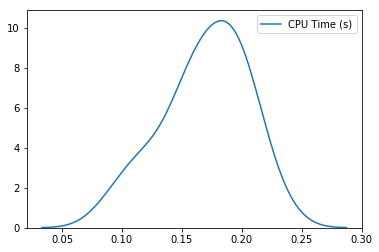

In [445]:
sns.kdeplot(df['CPU Time (s)']/main_df['CPU Time (s)'])
plt.show()

In [654]:
sns.set_style("whitegrid", {'axes.grid' : False})

In [635]:
main_df['# TFs'] = main_df['tf_size']

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


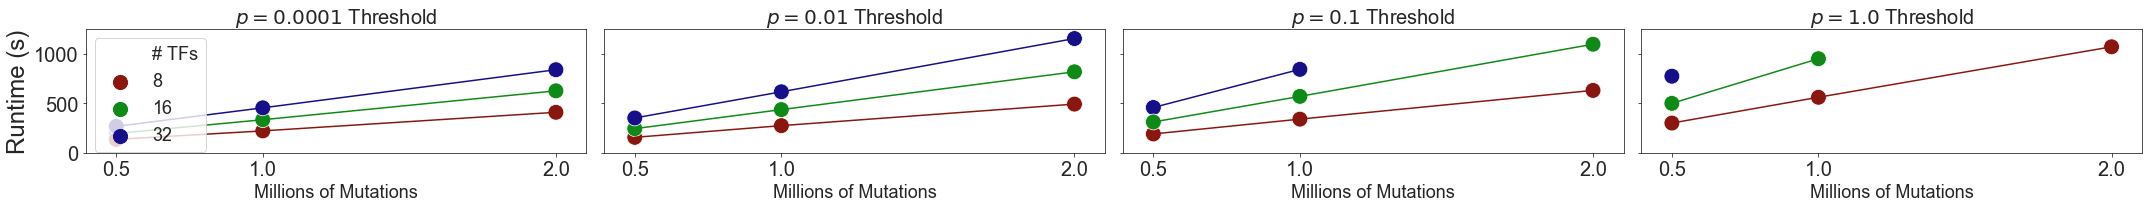

In [1059]:
fig, axes = plt.subplots(ncols=4, figsize=(30,3), sharey=True, sharex=True)
plt.tight_layout()

axes[0].tick_params(axis="x", which='both', labelsize=20)
axes[0].tick_params(axis="y", which='both', labelsize=20)
axes[1].tick_params(axis="x", which='both', labelsize=20)
axes[2].tick_params(axis="x", which='both', labelsize=20)
axes[3].tick_params(axis="x", which='both', labelsize=20)

pos_list=[0.5, 1.0, 2.0]
axes[0].xaxis.set_major_locator(ticker.FixedLocator((pos_list)))
axes[0].set_ylim((0, 1250))
#for a in axes:
#    a.set(xscale="log")
    
axes[0].set_title('$p = 0.0001$ Threshold', fontsize=20)
axes[1].set_title('$p = 0.01$ Threshold', size=20)
axes[2].set_title('$p = 0.1$ Threshold', size=20)
axes[3].set_title('$p = 1.0$ Threshold', size=20)

axes[0].set_xlabel('Millions of Mutations', fontsize=18)
axes[1].set_xlabel('Millions of Mutations', fontsize=18)
axes[2].set_xlabel('Millions of Mutations', fontsize=18)
axes[3].set_xlabel('Millions of Mutations', fontsize=18)

hue = '# TFs'
s = 250
y = 'CPU Time (s)'
x = 'Millions of Mutations'
mask_col = 'p-Value Threshold'
palette=sns.hls_palette(3, l=.3, s=.8)
data = main_df

sns.scatterplot(y=y, x=x, data = data[data[mask_col] == 0.0001], hue=hue, ax=axes[0], markers=True, palette=palette, s=s)
sns.lineplot(y=y, x=x, data = data[data[mask_col] == 0.0001], hue=hue, ax=axes[0], markers=True, palette=palette, legend=False)

sns.scatterplot(y=y, x=x, data = data[data[mask_col] == 0.01], hue=hue, ax=axes[1], markers=True, palette=palette, s=s, legend=False)
sns.lineplot(y=y, x=x, data = data[data[mask_col] == 0.01], hue=hue, ax=axes[1], markers=True, palette=palette, legend=False)
 
sns.scatterplot(y=y, x=x, data = data[data[mask_col] == 0.1], hue=hue, ax=axes[2], markers=True, palette=palette, s=s, legend=False)
sns.lineplot(y=y, x=x, data = data[data[mask_col] == 0.1], hue=hue, ax=axes[2], markers=True, palette=palette, legend=False)

sns.scatterplot(y=y, x=x, data = data[data[mask_col] == 1.0], hue=hue, ax=axes[3], markers=True, palette=palette, s=s, legend=False)
sns.lineplot(y=y, x=x, data = data[data[mask_col] == 1.0], hue=hue, ax=axes[3], markers=True, palette=palette, legend=False)

handles, labels = axes[0].get_legend_handles_labels()
legend = axes[0].legend(handles, labels, loc=2, prop={'size': 18})

#plt.suptitle('Software v3 Total Runtime', size=40, y=1.10)

#legend = plt.legend(bbox_to_anchor=(-.5, -.4), loc=5, borderaxespad=0., prop={'size': 28})

legend.legendHandles[1]._sizes = [s*.8]
legend.legendHandles[2]._sizes = [s*.8]
legend.legendHandles[3]._sizes = [s*.8]
#legend.legendHandles[4]._sizes = [s*.8]
axes[0].set_ylabel('Runtime (s)', fontsize=24)

bb = bbox.from_bounds(-.9,-.4, 31.5, 3.5)
plt.savefig('sw_main_perf.pdf', bbox_inches=bb)

plt.show()

## Portion of Runtime

In [668]:
def extract_init(local_dat):
    return float(local_dat[local_dat['filename:lineno(function)'].apply(lambda x: 'inittbl' in str(x))]['cumtime'].values[0])

def extract_postproc(local_dat):
    return float(local_dat[local_dat['filename:lineno(function)'].apply(lambda x: 'postprocess' in str(x))]['cumtime'].values[0])

def extract_save(local_dat):
    return float(local_dat[local_dat['filename:lineno(function)'].apply(lambda x: 'to_csv' in str(x))]['cumtime'].values[0])


In [673]:
extract_save(is_data[('1m', '32', '0.01.')])

172.53900000000002

In [681]:
init_vals = {}
postproc_vals = {}
save_vals = {}
do_predict_vals = {}

for k,v in is_data.items():
    init_vals[k] = extract_init(v)
    postproc_vals[k] = extract_postproc(v)
    do_predict_vals[k] = extract_do_prediction(v)
    try:
        save_vals[k] = extract_save(v)
    except:
        continue
    

init_df = pd.DataFrame.from_dict(init_vals, orient='index')
postproc_df = pd.DataFrame.from_dict(postproc_vals, orient='index')
save_df = pd.DataFrame.from_dict(save_vals, orient='index')
do_predict_df = pd.DataFrame.from_dict(do_predict_vals, orient='index')

for d in [init_df, postproc_df, save_df, do_predict_df]:
    
    try:
        d.drop(('2m', '32', '1.0.'), inplace=True, axis=0)
        d.drop(('2m', '16', '1.0.'), inplace=True, axis=0)
        d.drop(('1m', '32', '1.0.'), inplace=True, axis=0)
        d.drop(('2m', '32', '0.1.'), inplace=True, axis=0)

        d.reset_index(inplace=True)

        d['Millions of Mutations'] = d['index'].apply(lambda x: float(x[0][:-1]))
        d['tf_size'] = d['index'].apply(lambda x: int(x[1]))
        d['p-Value Threshold'] = d['index'].apply(lambda x: float(x[2][:-1]))

        d.drop('index', axis=1, inplace=True)
        r = d.columns.values
        d.columns = ['CPU Time (s)'] + [r[1], r[2], r[3]]

        display(d.shape)
        display(d.head())
    except:
        d.drop(('1m', '32', '1.0.'), inplace=True, axis=0)
        d.reset_index(inplace=True)

        d['Millions of Mutations'] = d['index'].apply(lambda x: float(x[0][:-1]))
        d['tf_size'] = d['index'].apply(lambda x: int(x[1]))
        d['p-Value Threshold'] = d['index'].apply(lambda x: float(x[2][:-1]))

        d.drop('index', axis=1, inplace=True)
        r = d.columns.values
        d.columns = ['CPU Time (s)'] + [r[1], r[2], r[3]]

        display(d.shape)
        display(d.head())

(32, 4)

,CPU Time (s),Millions of Mutations,tf_size,p-Value Threshold
0,215.067,2.0,8,1.00
1,73.857,0.5,8,0.01
2,208.364,2.0,32,0.01
3,72.835,0.5,8,1.00
4,72.624,0.5,32,0.10


(32, 4)

,CPU Time (s),Millions of Mutations,tf_size,p-Value Threshold
0,231.072,2.0,8,1.00
1,15.116,0.5,8,0.01
2,247.433,2.0,32,0.01
3,56.298,0.5,8,1.00
4,93.580,0.5,32,0.10


(32, 4)

,CPU Time (s),Millions of Mutations,tf_size,p-Value Threshold
0,349.538,2.0,8,1.00
1,23.861,0.5,8,0.01
2,342.781,2.0,32,0.01
3,89.854,0.5,8,1.00
4,134.783,0.5,32,0.10


(32, 4)

,CPU Time (s),Millions of Mutations,tf_size,p-Value Threshold
0,508.915,2.0,8,1.00
1,58.874,0.5,8,0.01
2,606.043,2.0,32,0.01
3,138.543,0.5,8,1.00
4,251.380,0.5,32,0.10


In [705]:
df['IsBound'] = df['CPU Time (s)']
df['Main'] = main_df['CPU Time (s)']
df['% IsBound'] = df['IsBound']/df['Main']
df['% Initialization'] = init_df['CPU Time (s)']/df['Main']
df['% Results Writing'] = save_df['CPU Time (s)']/df['Main']
df['% IsBound PostProcess'] = postproc_df['CPU Time (s)']/df['Main']
df['% Other IsBound Overhead'] = (do_predict_df['CPU Time (s)'] - df['IsBound'] - postproc_df['CPU Time (s)'])/df['Main']

# normalize to one (all are ~ 0.9999)
for c in df.columns[8:]:
    df[c] /= df.iloc[:, 8:].sum(axis=1)

In [706]:
df.head()

,CPU Time (s),Millions of Mutations,tf_size,p-Value Threshold,# of Transcription Factors,# TFs,IsBound,Main,% Initialization,% Results Writing,% IsBound PostProcess,% Other IsBound Overhead,% IsBound
0,212.025,2.0,8,1.00,8,8,212.025,1073.696,0.200338,0.325589,0.215231,0.061305,0.197485
1,18.915,0.5,8,0.01,8,8,18.915,156.639,0.471652,0.152355,0.096515,0.158620,0.120768
2,231.496,2.0,32,0.01,32,32,231.496,1157.334,0.180061,0.296212,0.213811,0.109840,0.200035
3,52.752,0.5,8,1.00,8,8,52.752,301.280,0.241790,0.298277,0.186879,0.097899,0.175104
4,89.811,0.5,32,0.10,32,32,89.811,458.836,0.158296,0.293776,0.203964,0.148185,0.195745


In [737]:
df['AdjLoc'] = np.log2(df['tf_size']) - 3

In [758]:
from matplotlib import cm

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


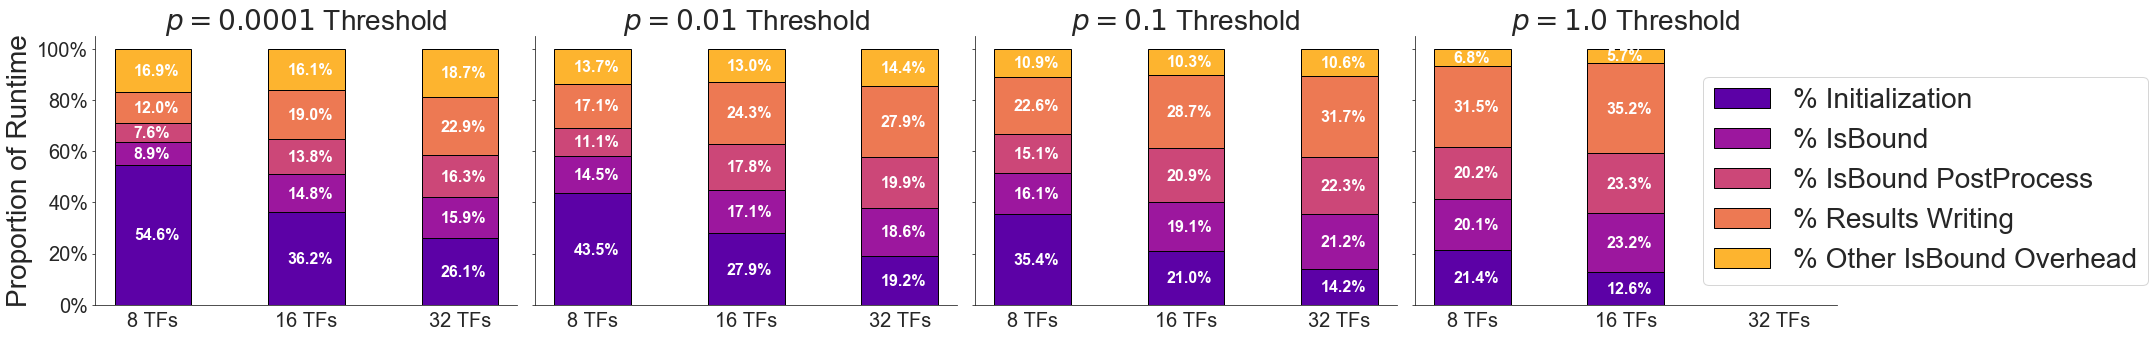

In [1065]:
fig, axes = plt.subplots(ncols=4, figsize=(30,4.8), sharey=True, sharex=True)
plt.tight_layout()

axes[0].tick_params(axis="x", which='both', labelsize=20)
axes[0].tick_params(axis="y", which='both', labelsize=20)
axes[1].tick_params(axis="x", which='both', labelsize=20)
axes[2].tick_params(axis="x", which='both', labelsize=20)
axes[3].tick_params(axis="x", which='both', labelsize=20)

#pos_list=[0.5, 1.0, 2.0]
#axes[0].xaxis.set_major_locator(ticker.FixedLocator((pos_list)))
#axes[0].set_ylim((0, 1250))
#for a in axes:
#    a.set(xscale="log")
    
axes[0].set_title('$p = 0.0001$ Threshold', fontsize=28)
axes[1].set_title('$p = 0.01$ Threshold', size=28)
axes[2].set_title('$p = 0.1$ Threshold', size=28)
axes[3].set_title('$p = 1.0$ Threshold', size=28)

#axes[0].set_xlabel('Millions of Mutations', fontsize=24)
#axes[1].set_xlabel('Millions of Mutations', fontsize=24)
#axes[2].set_xlabel('Millions of Mutations', fontsize=24)
#axes[3].set_xlabel('Millions of Mutations', fontsize=24)

bar_width = .5
y = 'CPU Time (s)'
x = 'AdjLoc'
mask_col = 'p-Value Threshold'
palette=sns.hls_palette(3, l=.3, s=.8)
data = df[df['Millions of Mutations'] == 1.0] # only 1m
cmap = cm.plasma

#plt.xlim((-.2, .8))
#plt.ylim((-.1, 1.1))

# loop stuff
bars = []
stacks = ['% Initialization','% IsBound', '% IsBound PostProcess', '% Results Writing', '% Other IsBound Overhead']
colors = [cmap((i+1)/(len(stacks)+1)) for i in range(len(stacks))]

for i, (p, ax) in enumerate(zip(sorted(data[mask_col].unique()), axes)):
    local_dat = data[data[mask_col] == p]
    running = local_dat[y] * 0.0
    for j, (c, s) in enumerate(zip(colors, stacks)):
        for x_loc, y_loc, v in zip(local_dat[x], running, local_dat[s]): 
            ax.text(x_loc-bar_width/4, y_loc + v/2-.02, str(round(v*100, 1))+'%', color='w', fontweight='bold', fontsize=16)
        bars += [ax.bar(local_dat[x], local_dat[s], bottom=running, color=c, edgecolor='k', width=bar_width, log=False)]
        running += local_dat[s]
        
plt.legend((bars[0], bars[1], bars[2], bars[3], bars[4]), stacks, prop={'size': 28},bbox_to_anchor=(.65, .9))

#ax = plt.gca()
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.xaxis.set_visible(False)
# ax.yaxis.set_visible(False)

locs, labels = plt.xticks() 
for a in axes:
    if a == axes[0]:
        a.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%']) 
        a.set_ylabel('Proportion of Runtime', size=28) 
    a.set_xticklabels(['', '8 TFs', '', '16 TFs', '', '32 TFs']) 
    a.tick_params(axis='x',which='both',bottom=False, top=False)
    sns.despine(ax=a, top=True, right=True)

#plt.annotate('32 Transcription Factors', (-.19, -.05), size=18)
#plt.annotate('128 Transcription Factors', (.4, -.05), size=18)

bb = bbox.from_bounds(-1,-.05, 35, 5.1)
plt.savefig('sw_breakdown.pdf', bbox_inches=bb)

plt.show()

In [901]:
hw_df = pd.read_csv('hw_perf_data.csv', index_col=0)
hw_df.head()

,read_tables,read_kmers,transfer_tables,transfer_kmers,load_tables,start,transfer_results,Runtime (s),Millions of Mutations,# of Transcription Factors
0,92915,2916485,86641,3261314,94960,135072183,14661152,0.156186,1,1
1,92856,5073658,94212,6502651,92450,270109030,29306748,0.311272,2,1
2,92761,9511801,103598,13053213,95305,540204138,54783536,0.617844,4,1
3,97798,18617912,91544,26035387,93355,1080375448,115771214,1.241083,8,1
4,93182,35995636,105950,51896604,94499,2160743600,218567184,2.467497,16,1


In [905]:
hw_df['Kernel Runtime (s)'] = hw_df['start'] / 1e9

In [914]:
small_hw_df = hw_df[hw_df['# of Transcription Factors'] >= 32]
small_hw_df = small_hw_df[small_hw_df['# of Transcription Factors'] != 48]

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


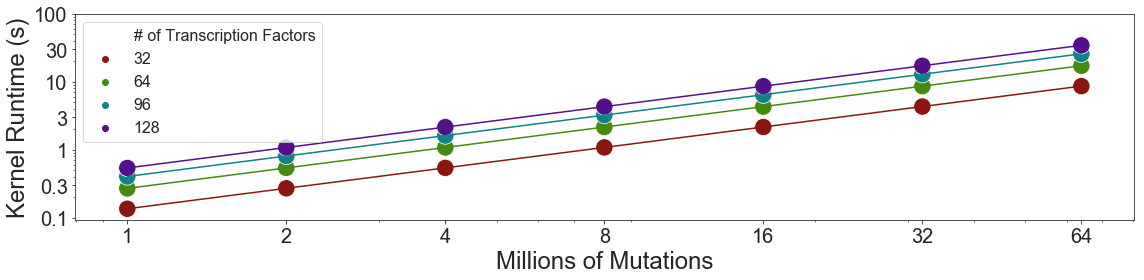

In [1054]:
fig, axes = plt.subplots(figsize=(16,4))
plt.tight_layout()

axes.tick_params(axis="x", which='both', labelsize=20)
axes.tick_params(axis="y", which='both', labelsize=20)

#axes.set(xscale="log")
axes.set(xscale="log", yscale='log')
     
axes.set_ylabel('Kernel Runtime (s)', fontsize=24)
axes.set_xlabel('Millions of Mutations', fontsize=24)

sns.scatterplot(y='Kernel Runtime (s)', x='Millions of Mutations', data = small_hw_df, hue='# of Transcription Factors', ax=axes, markers=True, palette=sns.hls_palette(4, l=.3, s=.8), s=300)
sns.lineplot(y='Kernel Runtime (s)', x='Millions of Mutations', data = small_hw_df, hue='# of Transcription Factors', ax=axes, markers=True, palette=sns.hls_palette(4, l=.3, s=.8), legend=False)

#plt.suptitle('Hardware v3Acc Performance', size=36, y=1.1)

legend = plt.legend(loc=2,prop={'size': 16})

#pos_list=[1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0]
#axes.xaxis.set_major_locator(ticker.FixedLocator((pos_list)))

locs, labels = plt.xticks() 
plt.yticks([0.1,0.3, 1, 3, 10, 30, 100], labels=['0.1', '0.3', '1', '3', '10', '30', '100'])
#plt.yticks([2**i for i in range(-3,6)], [str(2**i) for i in range(-3,6)])
plt.xticks([1, 2, 4, 8, 16, 32, 64], labels=['1', '2', '4', '8', '16', '32', '64'])
#a.tick_params(axis='x',which='both',bottom=False, top=False)
#sns.despine(ax=a, top=True, right=True)

#plt.ylim((0, 50))
#plt.xlim((0, 70))

#legend.legendHandles[1]._sizes = [200]
#legend.legendHandles[2]._sizes = [200]
#legend.legendHandles[3]._sizes = [200]
#legend.legendHandles[4]._sizes = [200]

bb = bbox.from_bounds(-1,-.6, 17, 4.7)
plt.savefig('hw_kernel_perf.pdf', bbox_inches=bb)


plt.show()

In [916]:
hw_df['% Transfer Results'] = hw_df['transfer_results']/1e9/hw_df['Runtime (s)']
hw_df['% IsBound Runtime'] = hw_df['start']/1e9/hw_df['Runtime (s)']
hw_df['% Read & Transfer Data'] = 1. - hw_df['% IsBound Runtime'] - hw_df['% Transfer Results']

In [917]:
hw_df['AdjLoc'] = np.log2(hw_df['# of Transcription Factors'])
hw_df.head()

,read_tables,read_kmers,transfer_tables,transfer_kmers,load_tables,start,transfer_results,Runtime (s),Millions of Mutations,# of Transcription Factors,Kernel Runtime (s),% Transfer Results,% IsBound Runtime,% Read & Transfer Data,AdjLoc
0,92915,2916485,86641,3261314,94960,135072183,14661152,0.156186,1,1,0.135072,0.093870,0.864818,0.041312,0.0
1,92856,5073658,94212,6502651,92450,270109030,29306748,0.311272,2,1,0.270109,0.094152,0.867760,0.038088,0.0
2,92761,9511801,103598,13053213,95305,540204138,54783536,0.617844,4,1,0.540204,0.088669,0.874337,0.036994,0.0
3,97798,18617912,91544,26035387,93355,1080375448,115771214,1.241083,8,1,1.080375,0.093282,0.870510,0.036207,0.0
4,93182,35995636,105950,51896604,94499,2160743600,218567184,2.467497,16,1,2.160744,0.088579,0.875682,0.035739,0.0


In [918]:
hw_loc_map = {y:x for x,y in enumerate(hw_df['# of Transcription Factors'].unique())}
hw_df['AdjLoc'] = hw_df['# of Transcription Factors'].map(hw_loc_map)

In [919]:
hw_df.head()

,read_tables,read_kmers,transfer_tables,transfer_kmers,load_tables,start,transfer_results,Runtime (s),Millions of Mutations,# of Transcription Factors,Kernel Runtime (s),% Transfer Results,% IsBound Runtime,% Read & Transfer Data,AdjLoc
0,92915,2916485,86641,3261314,94960,135072183,14661152,0.156186,1,1,0.135072,0.093870,0.864818,0.041312,0
1,92856,5073658,94212,6502651,92450,270109030,29306748,0.311272,2,1,0.270109,0.094152,0.867760,0.038088,0
2,92761,9511801,103598,13053213,95305,540204138,54783536,0.617844,4,1,0.540204,0.088669,0.874337,0.036994,0
3,97798,18617912,91544,26035387,93355,1080375448,115771214,1.241083,8,1,1.080375,0.093282,0.870510,0.036207,0
4,93182,35995636,105950,51896604,94499,2160743600,218567184,2.467497,16,1,2.160744,0.088579,0.875682,0.035739,0


In [923]:
small_hw_df = hw_df[hw_df['# of Transcription Factors'] >= 32]
small_hw_df = small_hw_df[small_hw_df['# of Transcription Factors'] != 48]

small_hw_loc_map = {y:x for x,y in enumerate(small_hw_df['# of Transcription Factors'].unique())}
small_hw_df['AdjLoc'] = small_hw_df['# of Transcription Factors'].map(small_hw_loc_map)

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


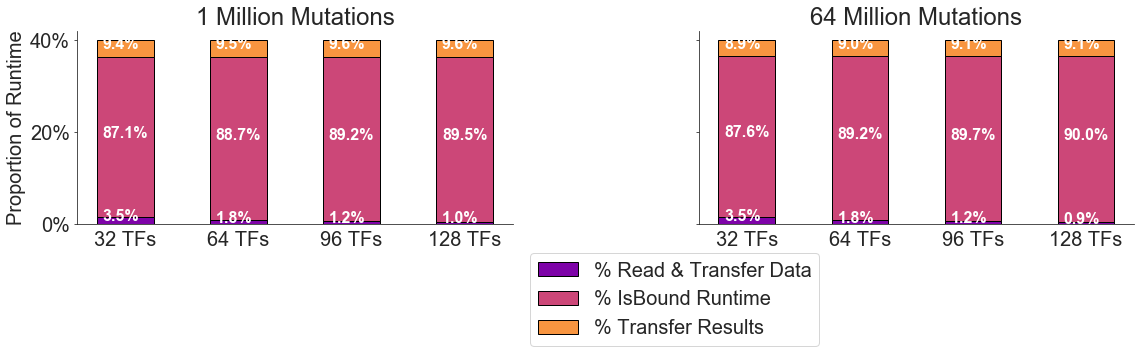

In [1052]:
fig, axes = plt.subplots(ncols=2, figsize=(16,5), sharey=True, sharex=True)
#plt.tight_layout()

axes[0].tick_params(axis="x", which='both', labelsize=20)
axes[0].tick_params(axis="y", which='both', labelsize=20)
axes[1].tick_params(axis="x", which='both', labelsize=20)
#axes[2].tick_params(axis="x", which='both', labelsize=20)
#axes[3].tick_params(axis="x", which='both', labelsize=20)

#pos_list=[0.5, 1.0, 2.0]
#axes[0].xaxis.set_major_locator(ticker.FixedLocator((pos_list)))
#axes[0].set_ylim((0, 1250))
#for a in axes:
#    a.set(xscale="log")
    
axes[0].set_title('1 Million Mutations', fontsize=24)
axes[1].set_title('64 Million Mutations', size=24)

#axes[0].set_xlabel('Millions of Mutations', fontsize=24)
#axes[1].set_xlabel('Millions of Mutations', fontsize=24)
#axes[2].set_xlabel('Millions of Mutations', fontsize=24)
#axes[3].set_xlabel('Millions of Mutations', fontsize=24)

bar_width = .5
x = 'AdjLoc'
y = 'Runtime (s)'
mask_col = 'Millions of Mutations'
palette=sns.hls_palette(3, l=.3, s=.8)
data = small_hw_df
cmap = cm.plasma

#plt.xlim((-.2, .8))
#plt.ylim((-.1, 1.1))

# loop stuff
bars = []
stacks = ['% Read & Transfer Data','% IsBound Runtime', '% Transfer Results']
colors = [cmap((i+1)/(len(stacks)+1)) for i in range(len(stacks))]

for i, (p, ax) in enumerate(zip(sorted([32, 64, 96, 128]), axes)):
    local_dat = data[data[mask_col] == p]
    running = local_dat[y] * 0.0
    for j, (c, s) in enumerate(zip(colors, stacks)):
        for x_loc, y_loc, v in zip(local_dat[x], running, local_dat[s]): 
            ax.text(x_loc-bar_width/2.5, y_loc + v/2-.001, str(round(v*100, 1))+'%', color='w', fontweight='bold', fontsize=16)
        bars += [ax.bar(local_dat[x], local_dat[s], bottom=running, color=c, edgecolor='k', width=bar_width, log=False)]
        running += local_dat[s]
        
plt.legend((bars[0], bars[1], bars[2]), stacks, prop={'size': 20},bbox_to_anchor=(0.3, -.1))

#ax = plt.gca()
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.xaxis.set_visible(False)
# ax.yaxis.set_visible(False)

locs, labels = plt.xticks() 
for a in axes:
    if a == axes[0]:
        a.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%']) 
        a.set_ylabel('Proportion of Runtime', size=20) 
    a.set_xticklabels(['', '32 TFs', '64 TFs', '96 TFs', '128 TFs'], size=18) 
    a.tick_params(axis='x',which='both',bottom=False, top=False)
    sns.despine(ax=a, top=True, right=True)
    
#plt.annotate('Number of Transcription Factors', (0,0), size=28)

#plt.annotate('32 Transcription Factors', (-.19, -.05), size=18)
#plt.annotate('128 Transcription Factors', (.4, -.05), size=18)

bb = bbox.from_bounds(0.5,-1.5, 14.5, 6.5)
plt.savefig('hw_breakdown.pdf', bbox_inches=bb)

plt.show()

In [934]:
sw_vs_hw_df = df[df['p-Value Threshold'] == 0.01]
sw_vs_hw_df = sw_vs_hw_df[sw_vs_hw_df['Millions of Mutations'] > .5]
sw_vs_hw_df.drop(['Main', '% Initialization', '% Results Writing', '% IsBound PostProcess', '% Other IsBound Overhead', '% IsBound'], axis=1, inplace=True)
sw_vs_hw_df = sw_vs_hw_df.sort_values(['Millions of Mutations', '# TFs'])
sw_vs_hw_df

,CPU Time (s),Millions of Mutations,tf_size,p-Value Threshold,# of Transcription Factors,# TFs,IsBound,AdjLoc
10,39.912,1.0,8,0.01,8,8,39.912,0.0
7,75.002,1.0,16,0.01,16,16,75.002,1.0
16,114.714,1.0,32,0.01,32,32,114.714,2.0
18,55.205,2.0,8,0.01,8,8,55.205,0.0
19,151.399,2.0,16,0.01,16,16,151.399,1.0
2,231.496,2.0,32,0.01,32,32,231.496,2.0


In [949]:
hw_to_merge = hw_df[(hw_df['Millions of Mutations'] <= 2.0) & (hw_df['# of Transcription Factors'] != 1) & (hw_df['# of Transcription Factors'] <= 32) & (hw_df['# of Transcription Factors'] != 24)].sort_values(['Millions of Mutations', '# of Transcription Factors'])
m = hw_to_merge['Runtime (s)']

In [950]:
sw_vs_hw_df = sw_vs_hw_df.reset_index()
sw_vs_hw_df['HW Kernel Runtime (s)'] = m.values

In [953]:
#sw_vs_hw_df.drop(sw_vs_hw_df.columns[:2], axis=1, inplace=True)
sw_vs_hw_df.head()

,index,CPU Time (s),Millions of Mutations,tf_size,p-Value Threshold,# of Transcription Factors,# TFs,IsBound,AdjLoc,HW Kernel Runtime (s),Kernel Speedup
0,0,39.912,1.0,8,0.01,8,8,39.912,0.0,0.156777,254.578890
1,1,75.002,1.0,16,0.01,16,16,75.002,1.0,0.157414,476.463441
2,2,114.714,1.0,32,0.01,32,32,114.714,2.0,0.158407,724.172321
3,3,55.205,2.0,8,0.01,8,8,55.205,0.0,0.311827,177.037344
4,4,151.399,2.0,16,0.01,16,16,151.399,1.0,0.312417,484.605988


In [952]:
sw_vs_hw_df['Kernel Speedup'] = sw_vs_hw_df['IsBound']/sw_vs_hw_df['HW Kernel Runtime (s)']
sw_vs_hw_df

,index,CPU Time (s),Millions of Mutations,tf_size,p-Value Threshold,# of Transcription Factors,# TFs,IsBound,AdjLoc,HW Kernel Runtime (s),Kernel Speedup
0,0,39.912,1.0,8,0.01,8,8,39.912,0.0,0.156777,254.578890
1,1,75.002,1.0,16,0.01,16,16,75.002,1.0,0.157414,476.463441
2,2,114.714,1.0,32,0.01,32,32,114.714,2.0,0.158407,724.172321
3,3,55.205,2.0,8,0.01,8,8,55.205,0.0,0.311827,177.037344
4,4,151.399,2.0,16,0.01,16,16,151.399,1.0,0.312417,484.605988
5,5,231.496,2.0,32,0.01,32,32,231.496,2.0,0.313519,738.380188


In [988]:
c5_cost = 0.432 
f1_cost = 1.565

sw_vs_hw_df['Kernel Cost Reduction'] = 1 - (f1_cost * sw_vs_hw_df['HW Kernel Runtime (s)'])/(c5_cost * sw_vs_hw_df['IsBound'])
sw_vs_hw_df

,index,CPU Time (s),Millions of Mutations,tf_size,p-Value Threshold,# of Transcription Factors,# TFs,IsBound,AdjLoc,HW Kernel Runtime (s),Kernel Speedup,Kernel Cost Reduction
0,0,39.912,1.0,8,0.01,8,8,39.912,0.0,0.156777,254.578890,0.985770
1,1,75.002,1.0,16,0.01,16,16,75.002,1.0,0.157414,476.463441,0.992397
2,2,114.714,1.0,32,0.01,32,32,114.714,2.0,0.158407,724.172321,0.994997
3,3,55.205,2.0,8,0.01,8,8,55.205,0.0,0.311827,177.037344,0.979537
4,4,151.399,2.0,16,0.01,16,16,151.399,1.0,0.312417,484.605988,0.992524
5,5,231.496,2.0,32,0.01,32,32,231.496,2.0,0.313519,738.380188,0.995094


/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


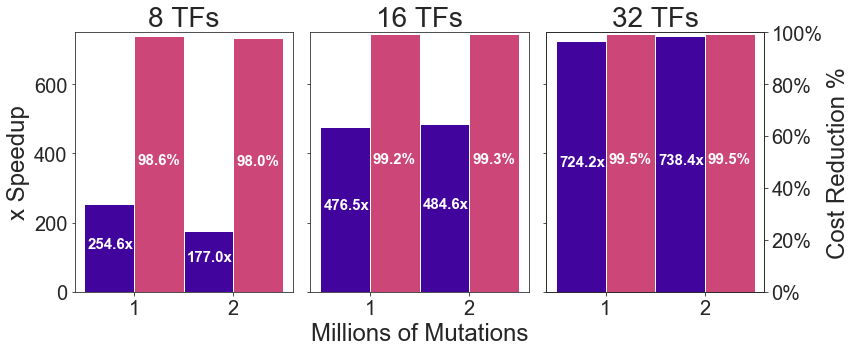

In [1016]:
fig, axes = plt.subplots(ncols=3, figsize=(12,5), sharey=True, sharex=True)
plt.tight_layout()

axes[0].tick_params(axis="x", which='both', labelsize=20)
axes[0].tick_params(axis="y", which='both', labelsize=20)
axes[1].tick_params(axis="x", which='both', labelsize=20)
axes[2].tick_params(axis="x", which='both', labelsize=20)
#axes[3].tick_params(axis="x", which='both', labelsize=20)

pos_list=[1.25, 2.25]
axes[0].xaxis.set_major_locator(ticker.FixedLocator((pos_list)))
axes[0].set_xticklabels(['1', '2'])
axes[0].set_ylim((0, 750))
#for a in axes:
#    a.set(xscale="log")
    
axes[0].set_title('8 TFs', fontsize=28)
axes[1].set_title('16 TFs', size=28)
axes[2].set_title('32 TFs', size=28)
# axes[3].set_title('$p = 1.0$ Threshold', size=28)

#axes[0].set_xlabel('Millions of Mutations', fontsize=24)
axes[1].set_xlabel('Millions of Mutations', fontsize=24)
#axes[2].set_xlabel('Millions of Mutations', fontsize=24)
#axes[3].set_xlabel('Millions of Mutations', fontsize=24)

hue = '# TFs'
bar_width = 0.5
s = 250
y = 'Kernel Speedup'
x = 'Millions of Mutations'
mask_col = 'p-Value Threshold'
palette=sns.hls_palette(3, l=.3, s=.8)
data = sw_vs_hw_df
fs=15

local_data = data[data['# TFs'] == 8]
axes[0].bar(height=local_data['Kernel Speedup'], x=local_data[x], color = cmap(1/10), width = bar_width)
for x_loc, v in zip(local_data[x], local_data['Kernel Speedup']): 
    axes[0].text(x_loc-bar_width/2.5-.02, v/2-.001, str(round(v, 1))+'x', color='w', fontweight='bold', fontsize=fs)
axes[0].bar(height=local_data['Kernel Cost Reduction']*750, x=local_data[x]+.5, color = cmap(5/10), width = bar_width)
for x_loc, v in zip(local_data[x], local_data['Kernel Cost Reduction']): 
    axes[0].text(x_loc-bar_width/2.5+.48, 750*v/2-.001, str(round(v*100, 1))+'%', color='w', fontweight='bold', fontsize=fs)

    
local_data = data[data['# TFs'] == 16]
axes[1].bar(height=local_data['Kernel Speedup'], x=local_data[x], color = cmap(1/10), width = bar_width)
for x_loc, v in zip(local_data[x], local_data['Kernel Speedup']): 
    axes[1].text(x_loc-bar_width/2.5-.02, v/2-.001, str(round(v, 1))+'x', color='w', fontweight='bold', fontsize=fs)
axes[1].bar(height=local_data['Kernel Cost Reduction']*750, x=local_data[x]+.5, color = cmap(5/10), width = bar_width)
for x_loc, v in zip(local_data[x], local_data['Kernel Cost Reduction']): 
    axes[1].text(x_loc-bar_width/2.5+.48, 750*v/2-.001, str(round(v*100, 1))+'%', color='w', fontweight='bold', fontsize=fs)
    
local_data = data[data['# TFs'] == 32]
axes[2].bar(height=local_data['Kernel Speedup'], x=local_data[x], color = cmap(1/10), width = bar_width)
for x_loc, v in zip(local_data[x], local_data['Kernel Speedup']): 
    axes[2].text(x_loc-bar_width/2.5-.02, v/2-.001, str(round(v, 1))+'x', color='w', fontweight='bold', fontsize=fs)
axes[2].bar(height=local_data['Kernel Cost Reduction']*750, x=local_data[x]+.5, color = cmap(5/10), width = bar_width)
for x_loc, v in zip(local_data[x], local_data['Kernel Cost Reduction']): 
    axes[2].text(x_loc-bar_width/2.5+.48, 750*v/2-.001, str(round(v*100, 1))+'%', color='w', fontweight='bold', fontsize=fs)

ax2 = axes[2].twinx() 
ax2.set_ylabel('Cost Reduction %', size=24) 
ax2.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'], size=20) 

# sns.scatterplot(y=y, x=x, data = data[data[mask_col] == 0.01], hue=hue, ax=axes[1], markers=True, palette=palette, s=s, legend=False)
# sns.lineplot(y=y, x=x, data = data[data[mask_col] == 0.01], hue=hue, ax=axes[1], markers=True, palette=palette, legend=False)
 
# sns.scatterplot(y=y, x=x, data = data[data[mask_col] == 0.1], hue=hue, ax=axes[2], markers=True, palette=palette, s=s, legend=False)
# sns.lineplot(y=y, x=x, data = data[data[mask_col] == 0.1], hue=hue, ax=axes[2], markers=True, palette=palette, legend=False)

# sns.scatterplot(y=y, x=x, data = data[data[mask_col] == 1.0], hue=hue, ax=axes[3], markers=True, palette=palette, s=s, legend=False)
# sns.lineplot(y=y, x=x, data = data[data[mask_col] == 1.0], hue=hue, ax=axes[3], markers=True, palette=palette, legend=False)

# handles, labels = axes[0].get_legend_handles_labels()
# legend = axes[0].legend(handles, labels, loc=2, prop={'size': 28})

#plt.suptitle('Software v3 Total Runtime', size=40, y=1.10)

#legend = plt.legend(bbox_to_anchor=(-.5, -.4), loc=5, borderaxespad=0., prop={'size': 28})

# legend.legendHandles[1]._sizes = [s*.8]
# legend.legendHandles[2]._sizes = [s*.8]
# legend.legendHandles[3]._sizes = [s*.8]
# #legend.legendHandles[4]._sizes = [s*.8]
axes[0].set_ylabel('x Speedup', fontsize=24)

bb = bbox.from_bounds(-.7,-.6, 14, 6.2)
plt.savefig('sw_vs_hw_kernel_speedup.pdf', bbox_inches=bb)

plt.show()